#  Turkish E-Commerce TV Market Deep Dive: Trendyol vs Hepsiburada Price War Analysis

##   Uncovering the Secrets Behind Turkey's Billion-Dollar TV Market

Welcome to an exclusive analysis of Turkey's competitive e-commerce landscape! This comprehensive study examines TV pricing strategies, consumer preferences, and market dynamics across Turkey's two e-commerce giants: **Trendyol** and **Hepsiburada**.

### 🎯 What You'll Discover:
- **Price war dynamics** between Turkey's top e-commerce platforms
- **Premium vs budget brand strategies** and their market positioning
- **Technology trends** driving consumer choices (OLED, QLED, Smart TV features)
- **Seasonal pricing patterns** and discount strategies
- **Consumer behavior insights** through review and rating analysis
- **Market share battles** and platform-specific advantages

Let's dive deep into the data and uncover the strategic moves shaping Turkey's digital marketplace!

## 🔧 Essential Libraries & Data Arsenal

Loading our analytical toolkit and the comprehensive datasets from Turkey's leading e-commerce platforms. We're about to analyze thousands of TV listings to understand market dynamics!

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_trendyol = pd.read_csv("trendyol_tv_verileri.csv", encoding='utf-8-sig')
df_hepsiburada = pd.read_csv("hepsiburada_tv_verileri.csv", encoding='utf-8-sig')

def data_inv(df):
    print("Number of rows:",df.shape[0])
    print("Dataset variables:", df.shape[1])
    print("-"*10)
    print("Dataset columns:\n")
    print(df.columns)
    print("-"*10)
    print('data-type of each column: \n')
    print(df.dtypes)
    print('-'*10)
    print('missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
    print('-'*10)
    print(df.head())
    print('-'*10)
    print(df.tail())

## 🔍 Data Quality Control: Preparing for Battle

Before we can uncover market insights, we need to clean and standardize our data. Turkish e-commerce data comes with unique challenges - different formatting, currency symbols, and review systems that need careful handling.

In [2]:
def yorum_duzenleme(df):
    df['Yorum Sayisi'] = df['Yorum Sayisi'].astype(str)
    df['Yorum Sayisi'] = df['Yorum Sayisi'].str.replace('(', '') \
                                           .str.replace(')', '') \
                                           .str.replace(',', '.') \
                                           .replace('Yorum Yok', '0')
    df['Yorum Sayisi'] = pd.to_numeric(df['Yorum Sayisi'], errors='coerce').fillna(0)
    df['Yorum Sayisi'] = df['Yorum Sayisi'].astype(np.int64)

def puan_duzenleme(df):
    df['Kullanici Puani'] = df['Kullanici Puani'].replace('Puan Yok', '0')  
    df['Kullanici Puani'] = df['Kullanici Puani'].astype(str).str.replace(',', '.', regex=False)
    df['Kullanici Puani'] = pd.to_numeric(df['Kullanici Puani'], errors='coerce').fillna(0)  
    df['Kullanici Puani'] = df['Kullanici Puani'].astype(np.float64)

## 🧹 Data Transformation & Platform Unification

Now we're standardizing data formats across both platforms and creating a unified dataset. This crucial step allows us to make fair comparisons between Trendyol and Hepsiburada's pricing strategies and market approaches.

In [3]:
df_trendyol['Tarih'] = pd.to_datetime(df_trendyol['Tarih'])
df_hepsiburada['Tarih'] = pd.to_datetime(df_hepsiburada['Tarih'])

df_trendyol['Fiyat'] = pd.to_numeric(df_trendyol['Fiyat'], errors='coerce').fillna(0).astype(np.int64)
df_hepsiburada['Fiyat'] = pd.to_numeric(df_hepsiburada['Fiyat'], errors='coerce').fillna(0).astype(np.int64)

df_hepsiburada['Marka'] = df_hepsiburada['Marka'].str.lower().str.capitalize()
df_trendyol['Marka'] = df_trendyol['Marka'].str.lower().str.capitalize()

puan_duzenleme(df_hepsiburada)
puan_duzenleme(df_trendyol)

yorum_duzenleme(df_hepsiburada)
yorum_duzenleme(df_trendyol)

df_combined = pd.concat([df_hepsiburada, df_trendyol], ignore_index=True)

## 💰 The Premium Brand Hierarchy: Who Commands the Highest Prices?

Let's uncover which TV brands dominate the premium segment in Turkey's market. This analysis reveals the brand positioning strategies and consumer willingness to pay premium prices.

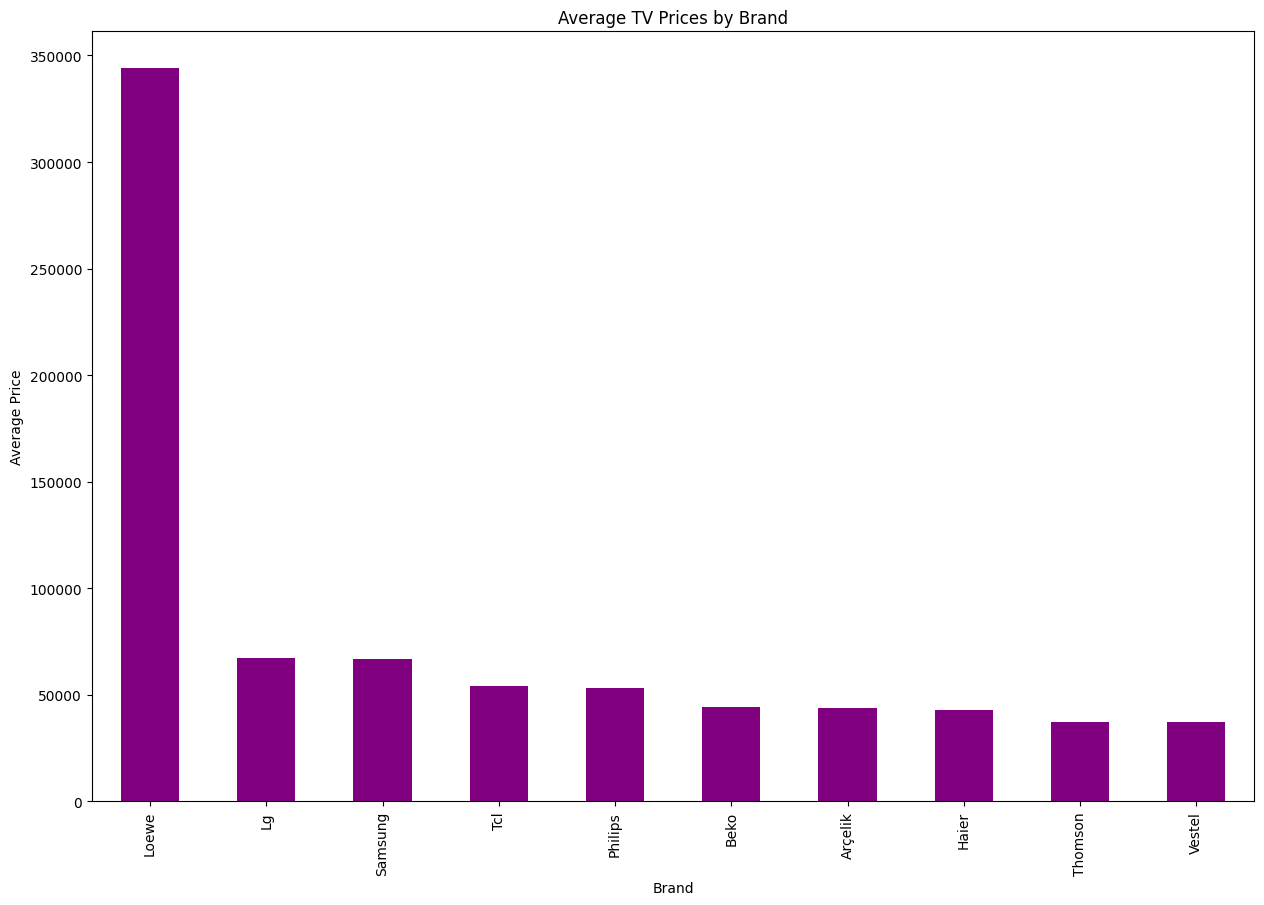

In [4]:
df_combined.groupby('Marka')['Fiyat'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='purple', figsize=(15, 10))
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average TV Prices by Brand')
plt.show()

## 📊 Platform Battle: Inventory & Market Share Analysis

Which platform offers more variety? Are there seasonal patterns in product availability? This analysis reveals the competitive dynamics between Turkey's e-commerce giants.

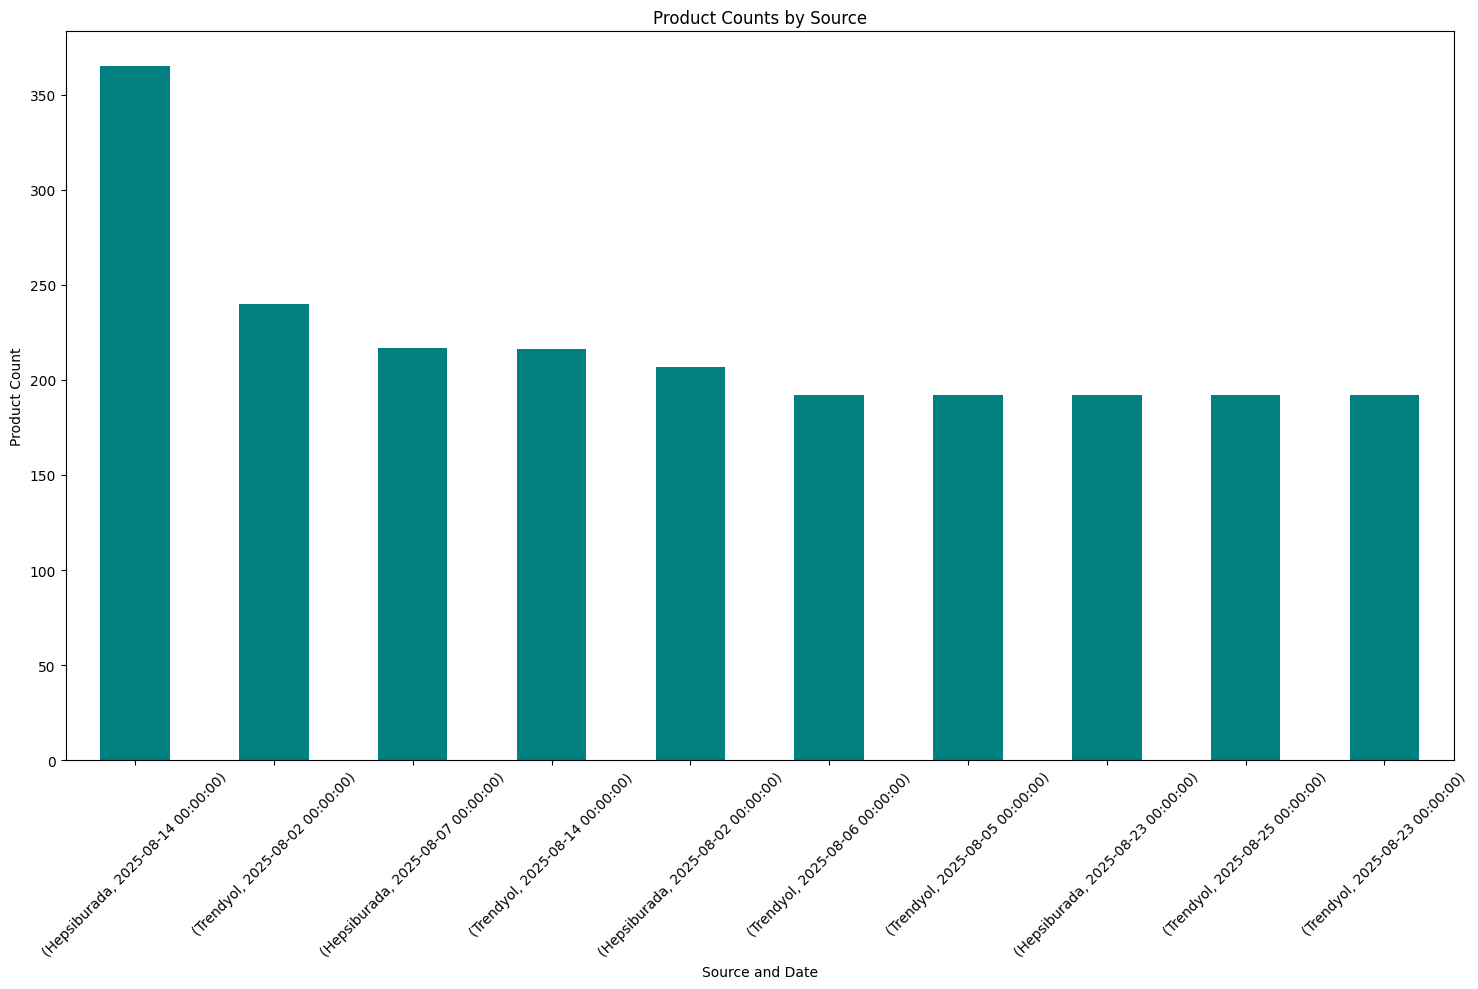

In [5]:
df_plot = df_combined.groupby(['Kaynak', 'Tarih'])['Ürün Adı'].count().sort_values(ascending=False).head(10)
df_plot.plot(kind='bar', color='teal', figsize=(15, 10))
plt.xlabel('Source and Date')
plt.ylabel('Product Count')
plt.title('Product Counts by Source')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🔬 Technology Intelligence: Feature Engineering for Market Insights

We're now extracting valuable technology features from product names to understand market trends. This includes display technologies (OLED, QLED), resolutions (4K, 8K), and smart features that drive consumer decisions.

In [6]:
ekran = ['QLED', 'OLED', 'LED', 'Mini LED','QNED']

def ekran_teknolojisi_belirle(row):
    for teknoloji in ekran:
        if teknoloji in row['Ürün Adı']:
            return teknoloji
    return 'Other'

df_combined['Ekran'] = df_combined.apply(ekran_teknolojisi_belirle, axis=1)

ekran_kalitesi = ['4K', '8K','HD', 'Full HD', 'UHD','2K']

def çözünürlük_belirle(row):
    for s in ekran_kalitesi:
        if s in row['Ürün Adı']:
            return s
    return 'Other'

df_combined['Çözünürlük'] = df_combined.apply(çözünürlük_belirle, axis=1)

teknoloji = ['Google TV','Uydu Alıcısı','Smart TV','Smart LED TV','Smart','Google Smart','Uydu Alıcılı']

def smart_teknoloji_belirle(row):
    for t in teknoloji:
        if t in row['Ürün Adı']:
            return t
    return 'Other'

df_combined['Teknoloji'] = df_combined.apply(smart_teknoloji_belirle, axis=1)

## 🌟 Consumer Trust Patterns: Reviews vs Ratings Analysis

Does more reviews mean higher ratings? How do different display technologies perform in customer satisfaction? This scatter plot reveals fascinating patterns in consumer behavior and product quality perception.

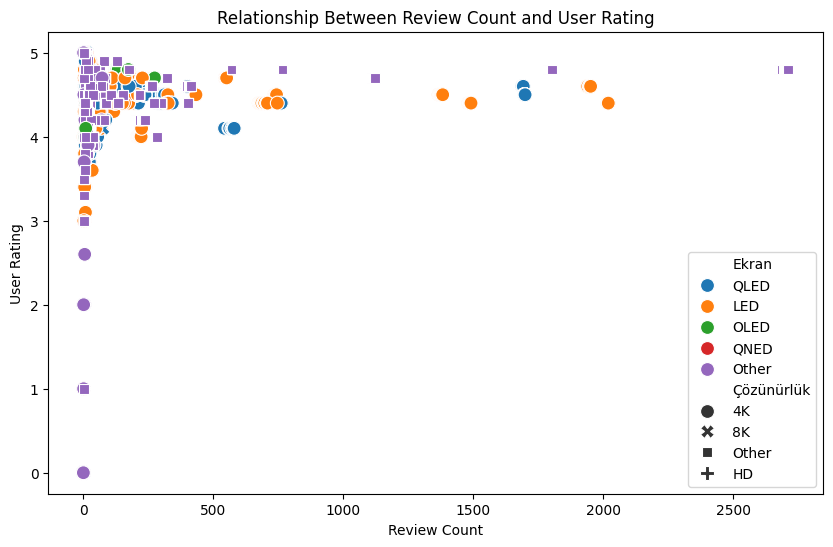

In [7]:
#Relationship between review count and user rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='Yorum Sayisi', y='Kullanici Puani', hue='Ekran', style='Çözünürlük', s=100)
plt.title('Relationship Between Review Count and User Rating')
plt.xlabel('Review Count')
plt.ylabel('User Rating')
plt.legend()
plt.show()

## 💎 The Technology Premium Matrix: How Much Extra Do Advanced Features Cost?

This analysis reveals the price premiums consumers pay for cutting-edge display technologies and resolutions. OLED vs QLED vs LED - which technology commands the highest premium in Turkey's market?

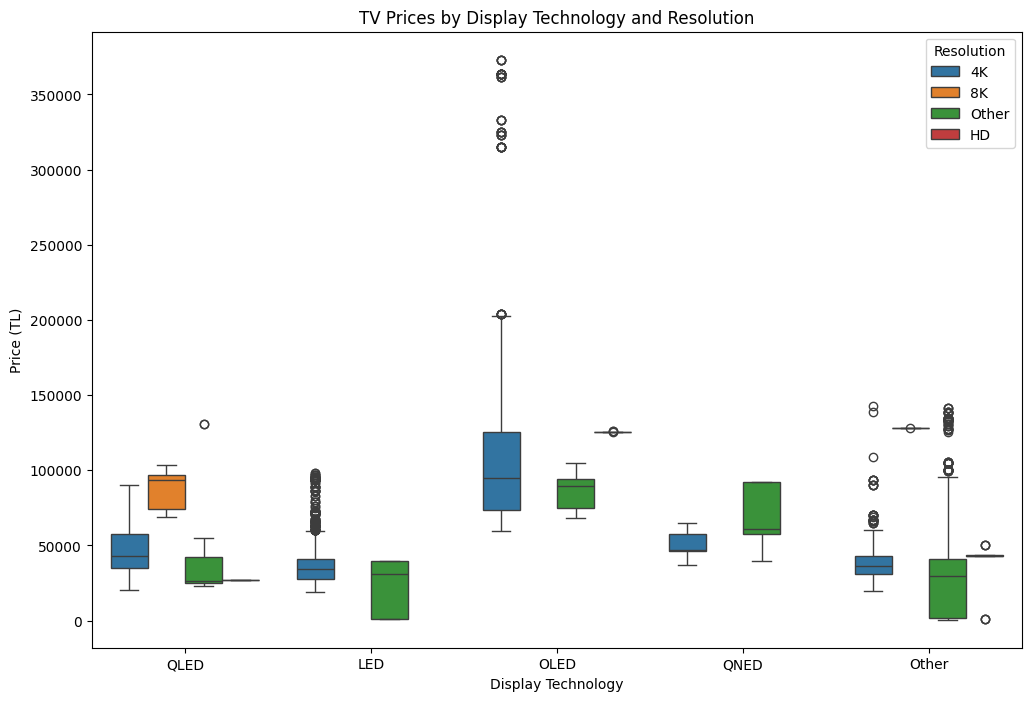

In [8]:
df_combined.groupby(['Ekran','Çözünürlük','Teknoloji'])['Fiyat'].mean()
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_combined, x='Ekran', y='Fiyat', hue='Çözünürlük')
plt.title('TV Prices by Display Technology and Resolution')
plt.xlabel('Display Technology')
plt.ylabel('Price (TL)')
plt.legend(title='Resolution')
plt.show()

## 🏆 Consumer Champions: The Most Popular TV Models in Turkey

Which specific TV models are Turkish consumers gravitating towards? This analysis reveals the winners in Turkey's competitive TV market and the features that drive mass appeal.

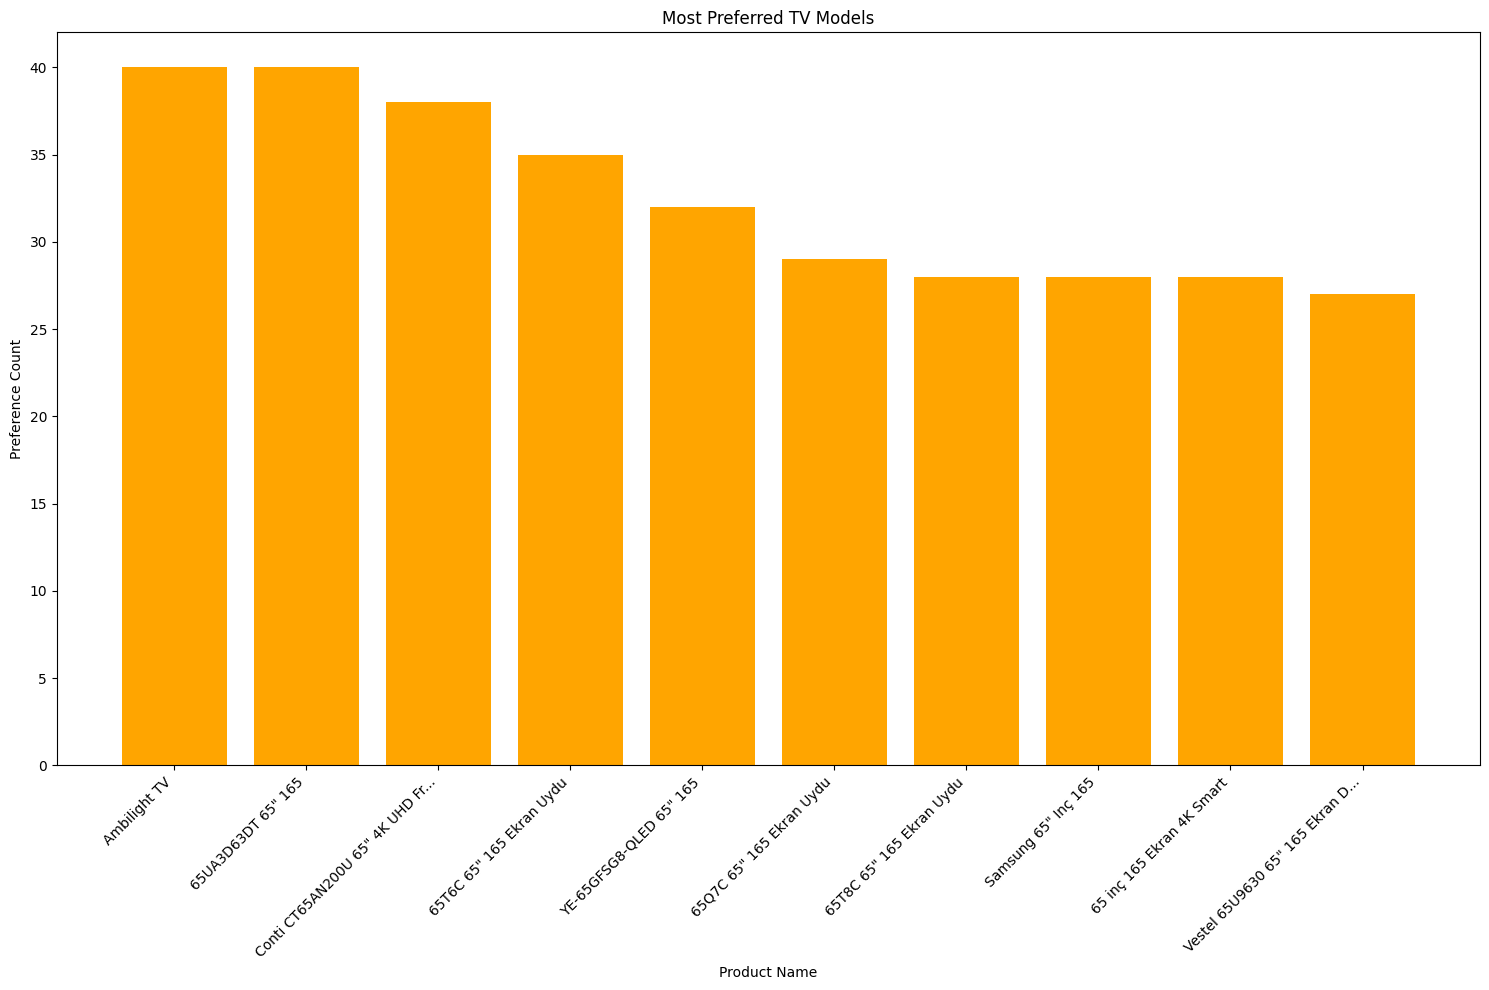

In [9]:
#Most preferred products.
# Product name shortening function
def urun_adi_kisalt(urun_adi, max_uzunluk=30):
    if len(urun_adi) > max_uzunluk:
        return urun_adi[:max_uzunluk] + "..."
    return urun_adi

en_cok_tercih_edilen = df_combined['Ürün Adı'].value_counts().head(10)
kisaltilmis_adlar = [urun_adi_kisalt(ad) for ad in en_cok_tercih_edilen.index]

plt.figure(figsize=(15, 10))
bars = plt.bar(range(len(en_cok_tercih_edilen)), en_cok_tercih_edilen.values, color='orange')
plt.xlabel('Product Name')
plt.ylabel('Preference Count')
plt.title('Most Preferred TV Models')
plt.xticks(range(len(en_cok_tercih_edilen)), kisaltilmis_adlar, rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 🎮 Smart TV Operating System Wars: Price Impact Analysis

Google TV vs Smart TV vs other operating systems - how do different smart TV platforms affect pricing? This analysis reveals the premium (or discount) associated with different TV operating systems in Turkey's market.

C:\Users\mazlu\AppData\Local\Temp\ipykernel_27840\3056311384.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Technology')


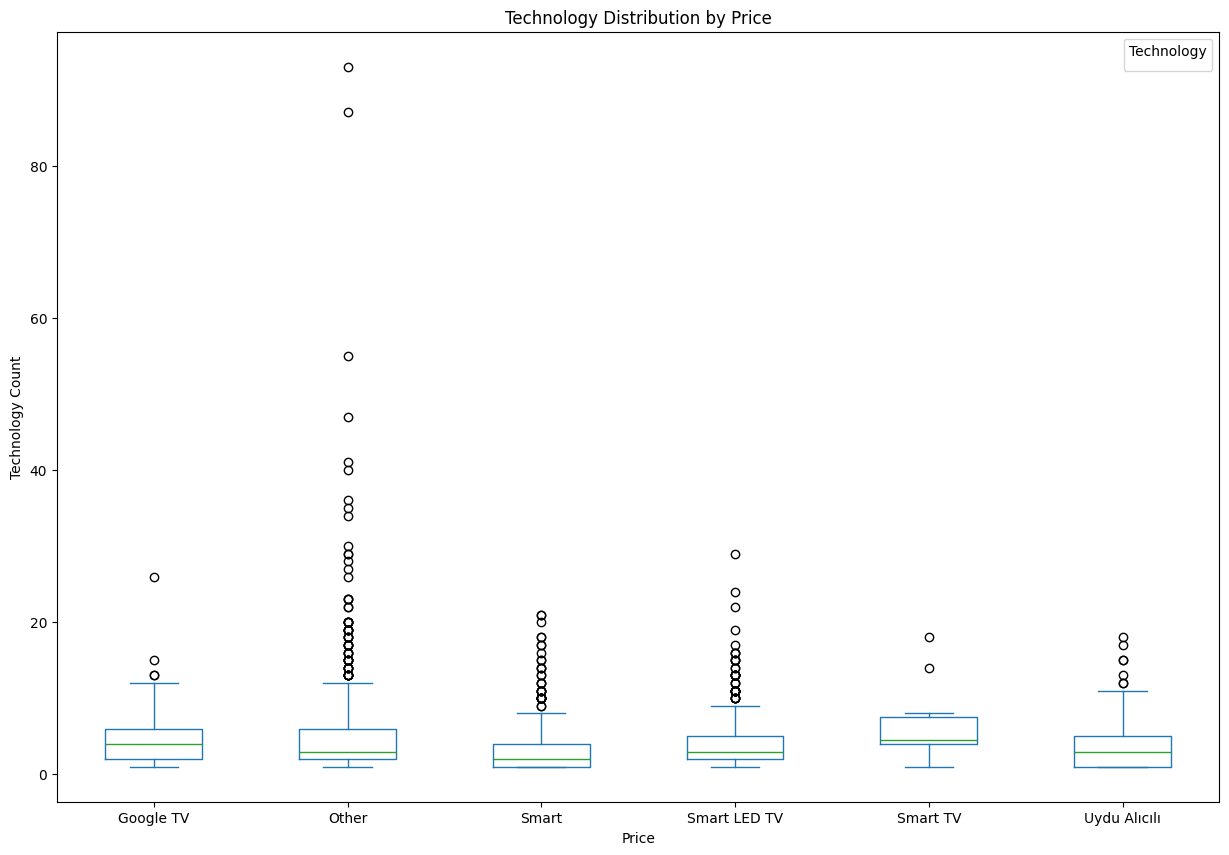

In [10]:
df_combined.groupby('Fiyat')['Teknoloji'].value_counts().unstack().plot(kind='box', stacked=True, figsize=(15, 10))
plt.xlabel('Price')
plt.ylabel('Technology Count')
plt.title('Technology Distribution by Price')
plt.legend(title='Technology')
plt.show()

## 📈 The Sweet Spot Discovery: Where Do Most TV Prices Cluster?

Understanding the price distribution helps identify the market's sweet spots - where most consumers are comfortable spending and where the competition is fiercest.

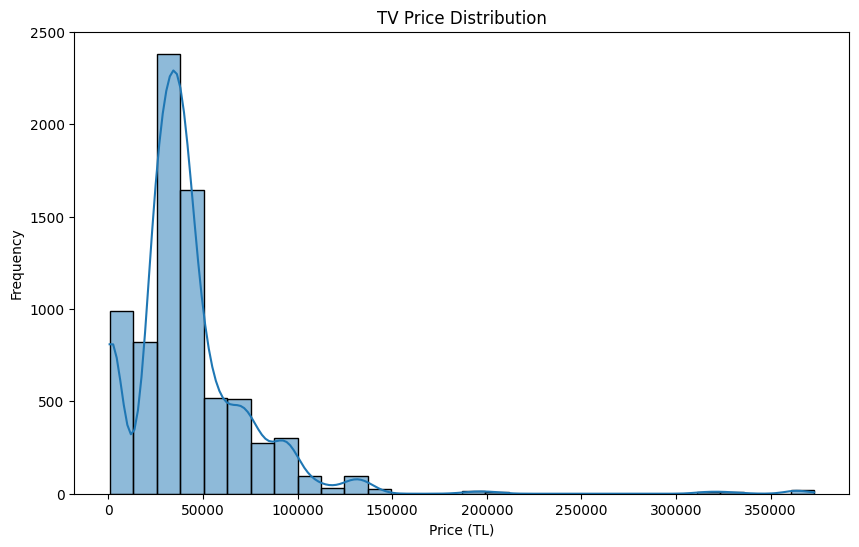

In [11]:
#Price distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['Fiyat'], bins=30, kde=True)
plt.xlabel('Price (TL)')
plt.ylabel('Frequency')
plt.title('TV Price Distribution')
plt.show()

## 📅 Seasonal Strategy Revealed: Price Fluctuations Over Time

When do prices drop? Are there specific discount seasons? This time-series analysis reveals the strategic timing of price adjustments and promotional periods in Turkey's e-commerce TV market.

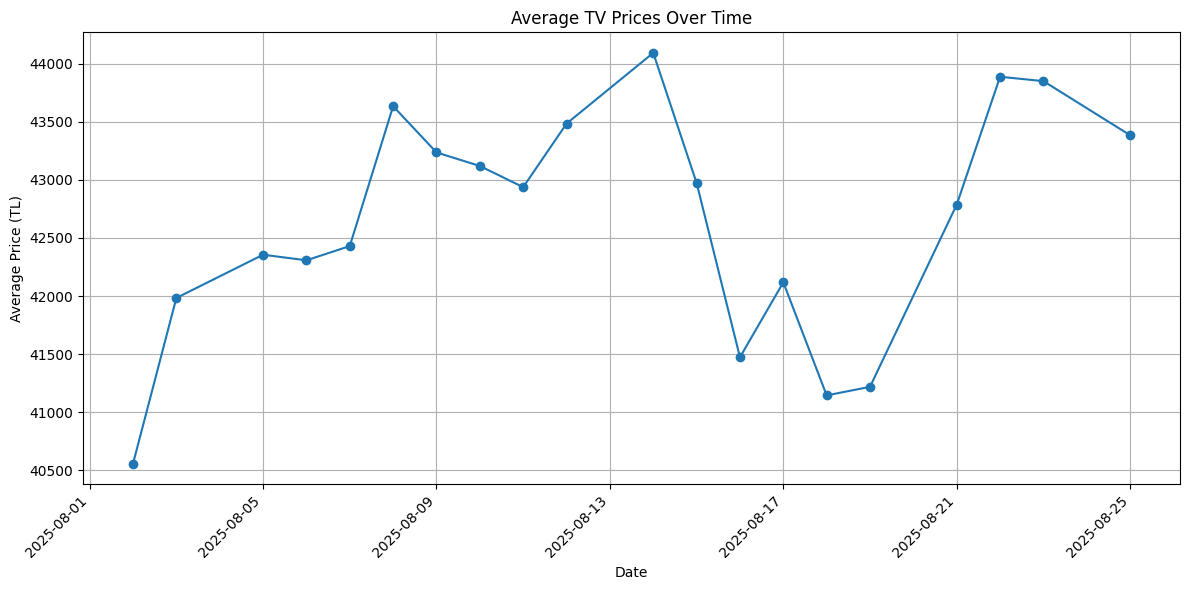

In [12]:
#Average price over time
plt.figure(figsize=(12, 6))
df_combined.groupby('Tarih')['Fiyat'].mean().plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Average Price (TL)')
plt.title('Average TV Prices Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### 🎯 Key Insight: The Discount Period Discovery!

**MAJOR FINDING:** A significant discount period is clearly visible in the chart! This suggests coordinated promotional strategies across both platforms, likely timed around major shopping events like Black Friday, New Year sales, or back-to-school periods.

## 🔗 The Correlation Web: Understanding Market Relationships

Our final analysis reveals the hidden connections between price, ratings, reviews, and other market factors. These correlations unlock the secret relationships driving Turkey's TV e-commerce market.

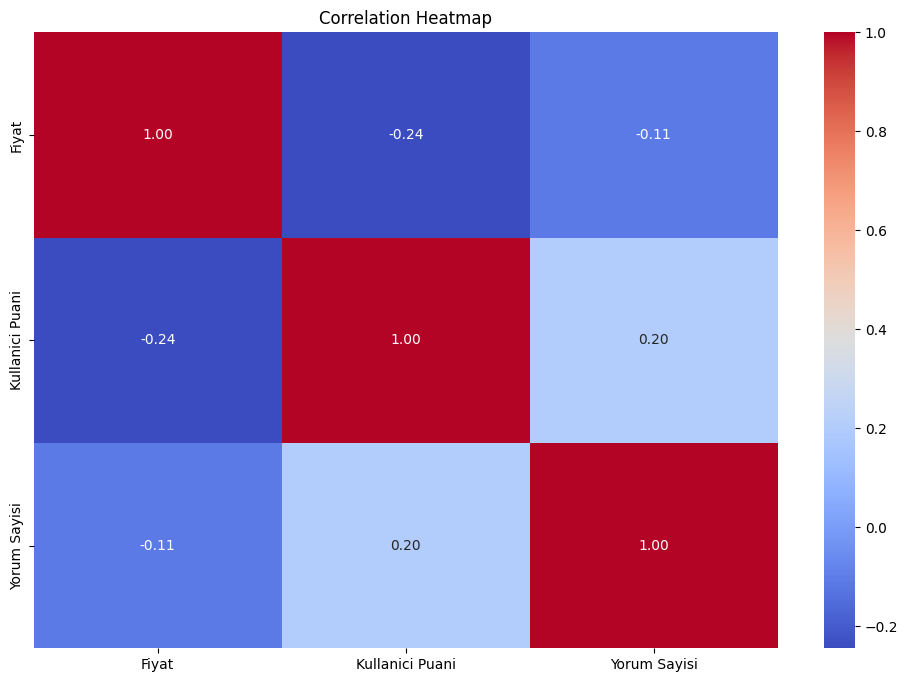

In [13]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_columns = df_combined.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

---

## 🎯 Strategic Market Insights: Key Takeaways

Our comprehensive analysis of Turkey's e-commerce TV market reveals several game-changing insights:

### 💰 **Pricing Strategy Discoveries:**
1. **Premium Brand Hierarchy** - Clear price positioning exists with certain brands commanding significant premiums
2. **Technology Premium Matrix** - Advanced display technologies (OLED, QLED) justify substantial price increases
3. **Seasonal Discount Patterns** - Coordinated promotional periods create significant price fluctuations

### 🏆 **Consumer Behavior Insights:**
1. **Review-Rating Dynamics** - Complex relationships between product popularity and customer satisfaction
2. **Technology Adoption Patterns** - Smart TV features and high resolutions drive consumer preferences
3. **Platform Competition Effects** - Both Trendyol and Hepsiburada show distinct inventory and pricing strategies

### 📊 **Market Structure Revelations:**
1. **Price Clustering** - Most products concentrate in specific price ranges, revealing market sweet spots
2. **Feature-Price Correlation** - Clear relationships between technical specifications and pricing
3. **Competitive Dynamics** - Platform-specific advantages and market positioning strategies

### 🚀 **Strategic Implications:**
- **For Retailers:** Optimal pricing windows and promotional timing strategies
- **For Brands:** Technology investment priorities and market positioning opportunities
- **For Consumers:** Best timing for purchases and value-for-money insights

This analysis provides a data-driven foundation for understanding Turkey's dynamic e-commerce TV market and the strategic moves shaping its future!

---

*Thank you for exploring Turkey's e-commerce TV market with us! If you found these insights valuable, please upvote and share your thoughts about the Turkish market dynamics in the comments below.* 🇹🇷📺✨